## 단순 선형 회귀

`y = wx + b`

- Simple Linear Regression Analysis
- 위 수식처럼 독립 변수(x) 하나에 따라 종속 변수(y)가 결정되면 단순 선형 회귀
- x가 여러 개면 다중 선형 회귀 (Multiple Linear Regression)
- 회귀 문제에서는 손실 함수로 **평균제곱오차(Mearn Squared Error:MSE)**를 사용

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
tf.__version__

'2.9.2'

### 데이터 준비

In [ ]:
X = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0])
y = np.array([5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
print(X.shape, y.shape)

(6,) (6,)


### 데이터 시각화

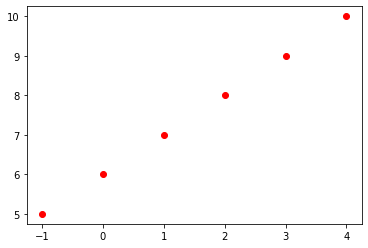

In [ ]:
plt.plot(X, y, 'ro')
plt.show()

### 모델 만들기
- 케라스를 이용해서 unit이 1개인 모델 만들기
- dense layer 혹은 fully connected layer

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1, input_shape=(1,)),
    # 출력 노드의 수
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일
- Sequential과 같은 메서드로 층을 구성한뒤 compile 메서드를 호출하여 학습 과정을 설명
- keras는 모델의 학습 전에 컴파일
- 손실함수와 옵티마이저 그리고 메트릭스를 설정
- `tf.keras.Model.compile` 파라미터
  - `optimizer`: sgd, adam, ..
  - `loss`: mse, categorical_crossentropy, ..
  - `metrics`: mae, acc, ..

In [ ]:
# 모델 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 모델 학습시키기
- `tf.keras.Model.fit` 파라미터
  - `epochs` : 전체 입력 데이터를 얼마나 순회할 것인가
  - `batch_size` : 데이터를 어떤 크기의 배치로 나누어서 학습할 것인가

In [ ]:
history = model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 673ms/step - loss: 71.4395 - mae: 8.1052
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 58.9777 - mae: 7.4556
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 49.1164 - mae: 6.8766
Epoch 4/30
1/1 [==============================] - 0s 7ms/step - loss: 41.3023 - mae: 6.3603
Epoch 5/30
1/1 [==============================] - 0s 17ms/step - loss: 35.0998 - mae: 5.8997
Epoch 6/30
1/1 [==============================] - 0s 7ms/step - loss: 30.1665 - mae: 5.4885
Epoch 7/30
1/1 [==============================] - 0s 7ms/step - loss: 26.2328 - mae: 5.1211
Epoch 8/30
1/1 [==============================] - 0s 11ms/step - loss: 23.0867 - mae: 4.7926
Epoch 9/30
1/1 [==============================] - 0s 13ms/step - loss: 20.5611 - mae: 4.4987
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 18.5249 - mae: 4.2354
Epoch 11/30
1/1 [==============================] - 0s 7ms/step - loss: 16.

### 학습 결과 시각화

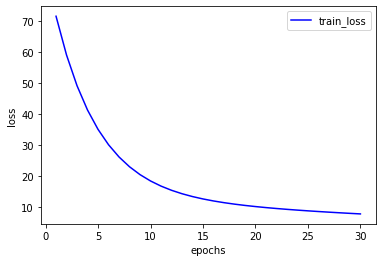

In [ ]:
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color = 'blue', label = 'train_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### 예측하기
- 입력 데이터는 배치 차원이 필요해서 한 개의 데이터를 입력하더라도 2차원으로 입력해야 함

In [ ]:
X_test = [[10.0]]

y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 74ms/step
[[23.335655]]


### 가중치 출력

In [ ]:
w, b = model.get_weights()
print("w: ", w)
print("b: ", b)

w:  [[2.1042778]]
b:  [2.2928777]


### 예측값 시각화하기

In [ ]:
y_pred = model.predict([X])
y_pred

1/1 [==============================] - 0s 43ms/step


array([[ 0.18859982],
       [ 2.2928777 ],
       [ 4.397156  ],
       [ 6.5014334 ],
       [ 8.605711  ],
       [10.70999   ]], dtype=float32)

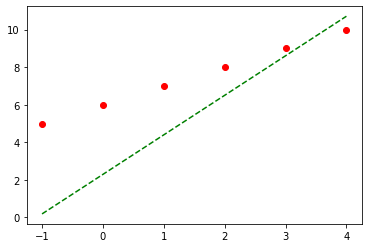

In [ ]:
# 시각화
plt.plot(X, y, 'ro')
plt.plot(X, y_pred, 'g--')
plt.show()